In [2]:
# Load necessary libraries
library(ggplot2)
library(dplyr)
library(car)

# Load and clean the dataset,
# Factor education, self_employed,and loan_status
# Change amounts into 100,000s so they're easier to interpret and look cleaner
# Filter to keep only the approved loans, because we'll use only those to make our prediction model, rejected loans 
# are not required
# Remove the columns of loan id and loan status
loan_data <- read.csv("loan_approval_dataset.csv") |>
  mutate(across(c(education, self_employed, loan_status), ~trimws(.)),
         education = factor(education),
         self_employed = factor(self_employed),
         loan_status = factor(loan_status),
         across(c(income_annum, loan_amount, residential_assets_value,
                  commercial_assets_value, luxury_assets_value, bank_asset_value),
                ~ . / 100000)) |>
  filter(loan_status == "Approved") |>
  select(-c(loan_id, loan_status))

# Summary statistics
summary(loan_data)


Warning message:
“package ‘dplyr’ was built under R version 4.3.2”

Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode




 no_of_dependents        education    self_employed  income_annum  
 Min.   :0.000    Graduate    :1339   No :1318      Min.   : 2.00  
 1st Qu.:1.000    Not Graduate:1317   Yes:1338      1st Qu.:26.00  
 Median :2.500                                      Median :50.00  
 Mean   :2.475                                      Mean   :50.26  
 3rd Qu.:4.000                                      3rd Qu.:75.00  
 Max.   :5.000                                      Max.   :99.00  
  loan_amount      loan_term     cibil_score    residential_assets_value
 Min.   :  3.0   Min.   : 2.0   Min.   :300.0   Min.   : -1             
 1st Qu.: 75.0   1st Qu.: 4.0   1st Qu.:618.0   1st Qu.: 21             
 Median :146.0   Median :10.0   Median :711.0   Median : 54             
 Mean   :152.5   Mean   :10.4   Mean   :703.5   Mean   : 74             
 3rd Qu.:221.0   3rd Qu.:16.0   3rd Qu.:803.0   3rd Qu.:112             
 Max.   :395.0   Max.   :20.0   Max.   :900.0   Max.   :291             
 commercial_a

In [3]:
loan_data

no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
<int>,<fct>,<fct>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
2,Graduate,No,96,299,12,778,24,176,227,80
5,Graduate,No,87,330,4,678,225,148,292,43
0,Graduate,Yes,8,22,20,782,13,8,28,6
4,Graduate,Yes,29,112,2,547,81,47,95,31
2,Graduate,Yes,91,315,14,679,108,166,209,50
5,Not Graduate,No,47,107,10,794,57,39,164,44
2,Graduate,Yes,5,16,4,663,13,1,13,7
4,Not Graduate,Yes,29,94,14,780,29,28,67,43
2,Graduate,No,27,103,10,736,10,0,62,33


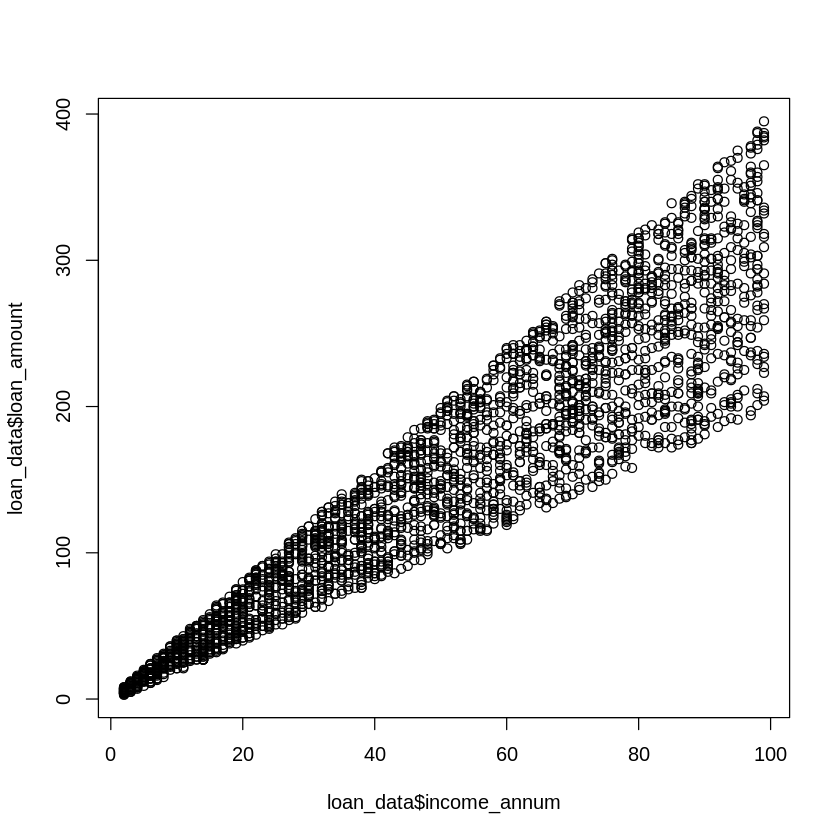

In [4]:
# Plot of income vs loan data
# Need to think of more such plots 
# Also need plots for collinearity of variables, (was there in one of the lectures but idr which)
plot(loan_data$income_annum,loan_data$loan_amount)

First we create the full model which includes all the explanatory variables. 

In [5]:
# Full model including all the variables
full_model<-lm(loan_amount~.,data=loan_data)
summary(full_model)


Call:
lm(formula = loan_amount ~ ., data = loan_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-98.395 -18.153   0.171  19.698  99.118 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)              26.468960   4.060459   6.519 8.46e-11 ***
no_of_dependents         -0.610683   0.379292  -1.610   0.1075    
educationNot Graduate    -0.464121   1.285379  -0.361   0.7181    
self_employedYes         -0.131761   1.286044  -0.102   0.9184    
income_annum              2.934869   0.078605  37.337  < 2e-16 ***
loan_term                -0.248972   0.111818  -2.227   0.0261 *  
cibil_score              -0.031683   0.005249  -6.036 1.80e-09 ***
residential_assets_value  0.007954   0.012794   0.622   0.5342    
commercial_assets_value   0.049574   0.019493   2.543   0.0110 *  
luxury_assets_value       0.003205   0.019054   0.168   0.8664    
bank_asset_value          0.032963   0.037911   0.869   0.3847    
---
Signif. codes:  0 ‘***’ 0.00

While the R^2 and the adjusted R^2 values are high, most of the explanatory variables are not statistically significant. 
We will further calculate the VIF values, in order to observe the presence of collinearity. Previously the correlation heatmap
showed that there is possible correlation between the variables and the VIF values will help support that. 

In [6]:
# VIF values of full model, shows high values of income, luxry assets, suggests there may be collinearity
vif(full_model)

no_of_dependents                education            self_employed 
                1.002766                 1.002100                 1.003148 
            income_annum                loan_term              cibil_score 
               11.978232                 1.048285                 1.048272 
residential_assets_value  commercial_assets_value      luxury_assets_value 
                1.677942                 1.776701                 7.378797 
        bank_asset_value 
                3.735757

Income per annum and luxury assets value have high values of VIF, especially income per annum. Logically this makes sense in the context, as income increases, one would more likely have more assets. One possible way forward is to change the explanatory variable into something else, in this instance we'll take the average of the assets value (residential, commercial, luxury, and bank assets) so that we have one explanatory that depicts the assets one possesses. We create a new model with all the explanatory variables, and its VIF values. 

In [7]:
#Model that takes the average of the assets value, since they're likely to be correlated. 
# Changes 4 variables into 1 variable
model_1<-lm(loan_amount~no_of_dependents+education+self_employed+income_annum+loan_term+cibil_score
            +I(rowMeans(cbind(residential_assets_value,
                              commercial_assets_value,luxury_assets_value,bank_asset_value))),data=loan_data)
summary(model_1)
vif(model_1)


Call:
lm(formula = loan_amount ~ no_of_dependents + education + self_employed + 
    income_annum + loan_term + cibil_score + I(rowMeans(cbind(residential_assets_value, 
    commercial_assets_value, luxury_assets_value, bank_asset_value))), 
    data = loan_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-99.772 -18.342   0.233  19.425  97.881 

Coefficients:
                                                                                                              Estimate
(Intercept)                                                                                                  26.363703
no_of_dependents                                                                                             -0.624923
educationNot Graduate                                                                                        -0.428302
self_employedYes                                                                                             -0.217778
income_annum                   

no_of_dependents 
                                                                                                    1.001737 
                                                                                                   education 
                                                                                                    1.001781 
                                                                                               self_employed 
                                                                                                    1.001997 
                                                                                                income_annum 
                                                                                                    7.771831 
                                                                                                   loan_term 
                                                                                                    1.047510 
                                                                                                 cibil_score 
                                                                                                    1.046510 
I(rowMeans(cbind(residential_assets_value, commercial_assets_value, luxury_assets_value, bank_asset_value))) 
                                                                                                    7.774906

There is still high VIF values for income and the average of assets value. The next step is to remove one of the variables comepletely. We will remove the assets value, since income is a more significant explanatory variable. We fit model_2 with all the remaining explanatory variables, and subsequently calculate the VIF values again.

In [8]:
# Remove the assets variable to see if it solves collinearity issue
model_2<-lm(loan_amount~no_of_dependents+education+self_employed+income_annum+loan_term+cibil_score,data=loan_data)
summary(model_2)


Call:
lm(formula = loan_amount ~ no_of_dependents + education + self_employed + 
    income_annum + loan_term + cibil_score, data = loan_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-100.165  -17.879    0.238   19.499   97.083 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           26.426662   4.061199   6.507 9.13e-11 ***
no_of_dependents      -0.617758   0.379353  -1.628   0.1035    
educationNot Graduate -0.462188   1.285983  -0.359   0.7193    
self_employedYes      -0.282722   1.285789  -0.220   0.8260    
income_annum           3.039452   0.022747 133.621  < 2e-16 ***
loan_term             -0.247170   0.111850  -2.210   0.0272 *  
cibil_score           -0.031620   0.005248  -6.025 1.92e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 33.11 on 2649 degrees of freedom
Multiple R-squared:  0.8714,	Adjusted R-squared:  0.8711 
F-statistic:  2991 on 6 and 2649 DF,  p-v

In [9]:
#Small VIF values, collinearity looks to be resolved
vif(model_2)

no_of_dependents        education    self_employed     income_annum 
        1.001640         1.001591         1.001302         1.001628 
       loan_term      cibil_score 
        1.047373         1.046339

All VIF values are small, and pose no concern now, indicating that the issue of collinearity appears to be resolved. Next, we need to decide including which explanatory variables produces the best linear model to explain the response variable. To do so, we will use the "regsubsets" command to find the best model for each number of parameters. Moreover, we calculate the Mallows' Cp statistic, in order to figure out the best model. 

,(Intercept),no_of_dependents,educationNot Graduate,self_employedYes,income_annum,loan_term,cibil_score
1,TRUE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE
2,TRUE,FALSE,FALSE,FALSE,TRUE,FALSE,TRUE
3,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE,TRUE
4,TRUE,TRUE,FALSE,FALSE,TRUE,TRUE,TRUE
5,TRUE,TRUE,TRUE,FALSE,TRUE,TRUE,TRUE
6,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE


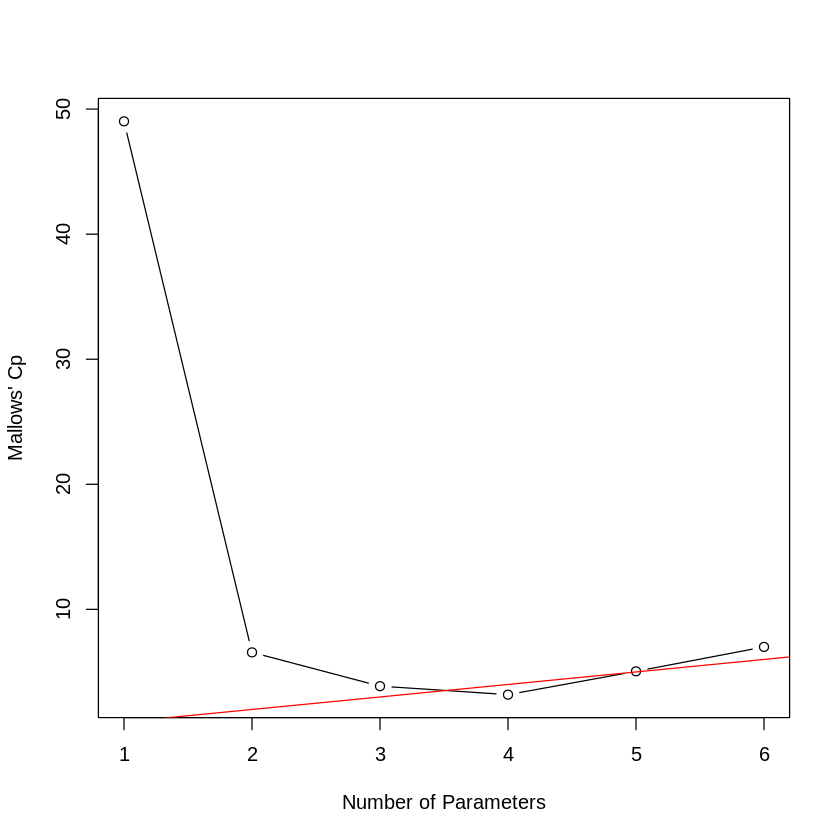

In [16]:
library(leaps)

# Perform exhaustive search to find best model for each number of parameter
model_subsets <- regsubsets(loan_amount ~ no_of_dependents+education+self_employed+income_annum+loan_term+cibil_score, data = loan_data)
model_summary <- summary(model_subsets)

# Output the summary$which
model_summary$which

# Plot Mallows' Cp
plot(model_summary$cp, xlab = "Number of Parameters", ylab = "Mallows' Cp", type = "b")
abline(0, 1, col = "red")

#Best model looks like one with 3 variables: income, loan term, and cibil score. Has mallow's cp close to its
# number of parameters while having low number of parameters.

From the Mallows' Cp plot, we can say that the model with 3 parameters appears to be the best model. This is because it has a Mallows' Cp value close to its p value while having a low number of parameters. Model with 4,5, and 6 parameters also have a Mallows' Cp value close to their respective p values, however we need to weigh the benefit compared to the disadvantage of adding an extra parameter. Thus the model with the explanatory variables: income per annum, loan term, and cibil score is chosen to be the best model explaining the response variable.

In [11]:
# Model selected from above
model_best<-lm(loan_amount~income_annum+cibil_score+loan_term,data=loan_data)
summary(model_best)

# All parameters are statistically significant which suggests we're on the right track


Call:
lm(formula = loan_amount ~ income_annum + cibil_score + loan_term, 
    data = loan_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-100.383  -18.170    0.317   19.564   98.096 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  24.637829   3.874480   6.359 2.38e-10 ***
income_annum  3.039545   0.022745 133.637  < 2e-16 ***
cibil_score  -0.031857   0.005245  -6.074 1.43e-09 ***
loan_term    -0.242348   0.111764  -2.168   0.0302 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 33.11 on 2652 degrees of freedom
Multiple R-squared:  0.8712,	Adjusted R-squared:  0.8711 
F-statistic:  5981 on 3 and 2652 DF,  p-value: < 2.2e-16


While the R^2 and the adjusted R^2 values are similar to those of the full model, we now have all parameters as statistically significant. The next step is to visualise the residuals, and evaluate the different diagnostic plots in order to see if there are any concerns with our linear model.

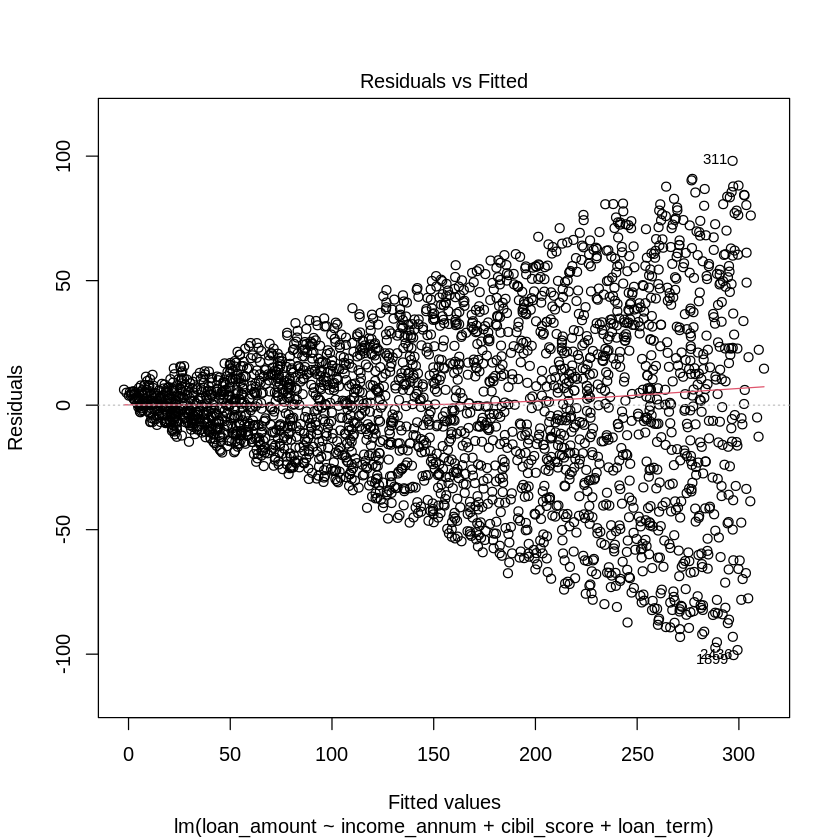

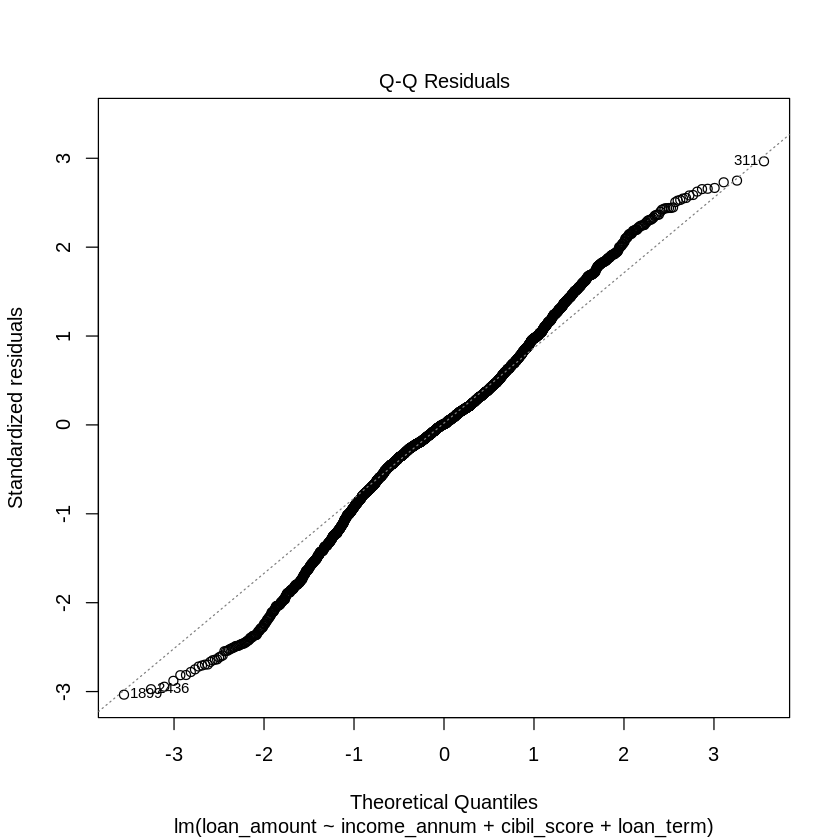

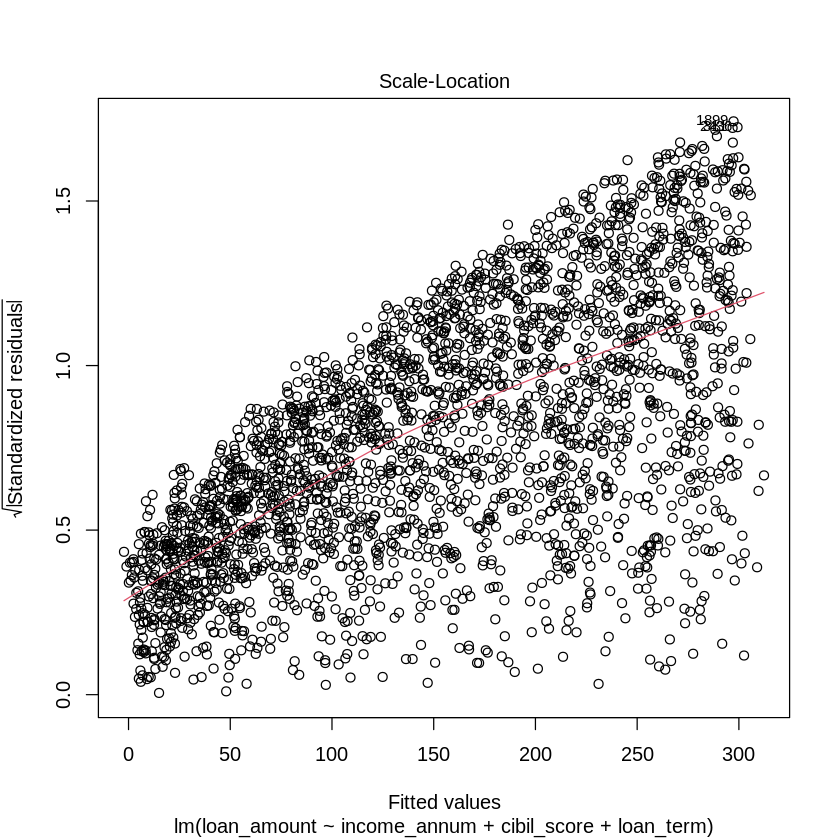

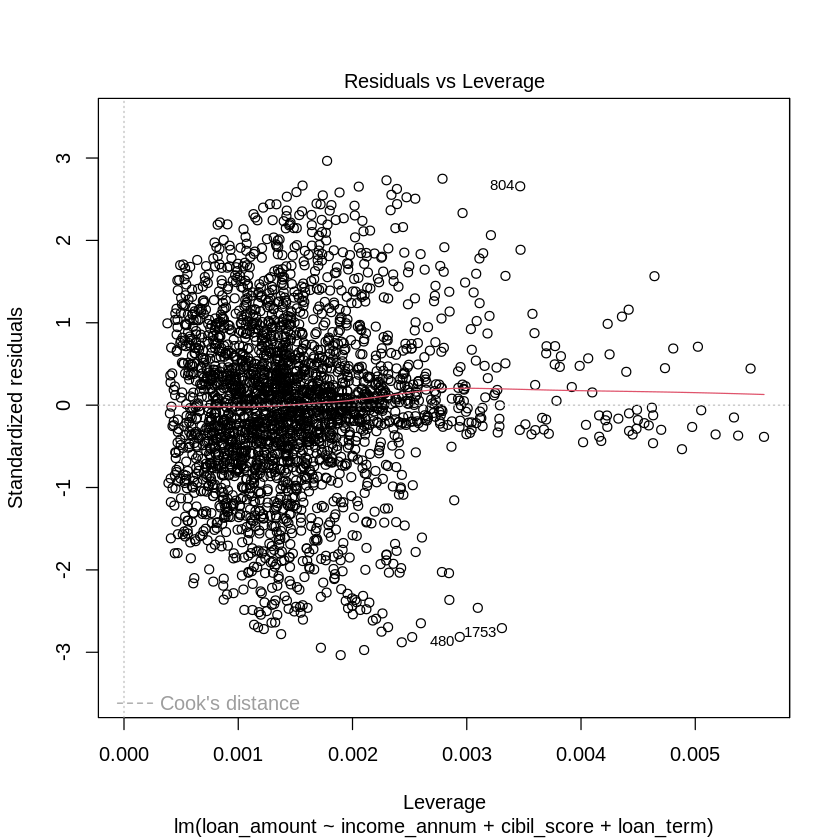

In [12]:
# Residual plots shows non-constant variance (heteroscedasticity)
plot(model_best)

The Residuals vs Fitted plot and Scale-Location show that there is heteroscedasticity (non-constant variance) which is a big concern. There is fanning out of the residuals, so the residuals get larger as the fitted value increases. One method to tackle this is taking the log of the response (loan amount), so let's try that.

In [13]:
model_log<-lm(I(sqrt(loan_amount))~income_annum+cibil_score+loan_term,data=loan_data)
summary(model_log)


Call:
lm(formula = I(sqrt(loan_amount)) ~ income_annum + cibil_score + 
    loan_term, data = loan_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.1073 -0.9632  0.0617  1.1073  2.6725 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   5.7146963  0.1626445  35.136  < 2e-16 ***
income_annum  0.1369971  0.0009548 143.484  < 2e-16 ***
cibil_score  -0.0012524  0.0002202  -5.688 1.42e-08 ***
loan_term    -0.0075227  0.0046917  -1.603    0.109    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.39 on 2652 degrees of freedom
Multiple R-squared:  0.8863,	Adjusted R-squared:  0.8862 
F-statistic:  6891 on 3 and 2652 DF,  p-value: < 2.2e-16


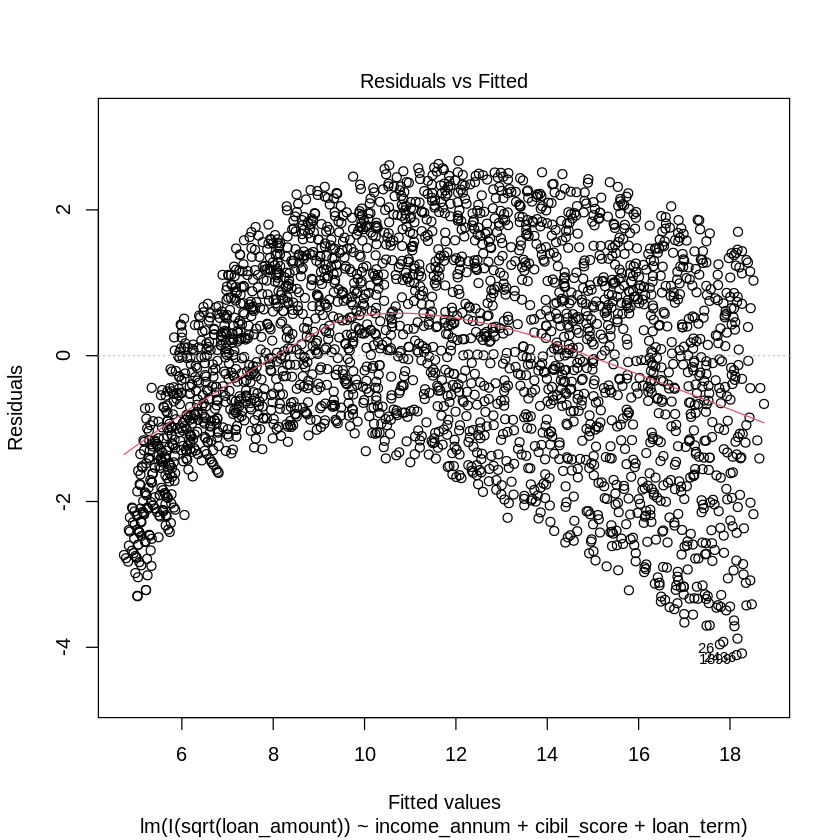

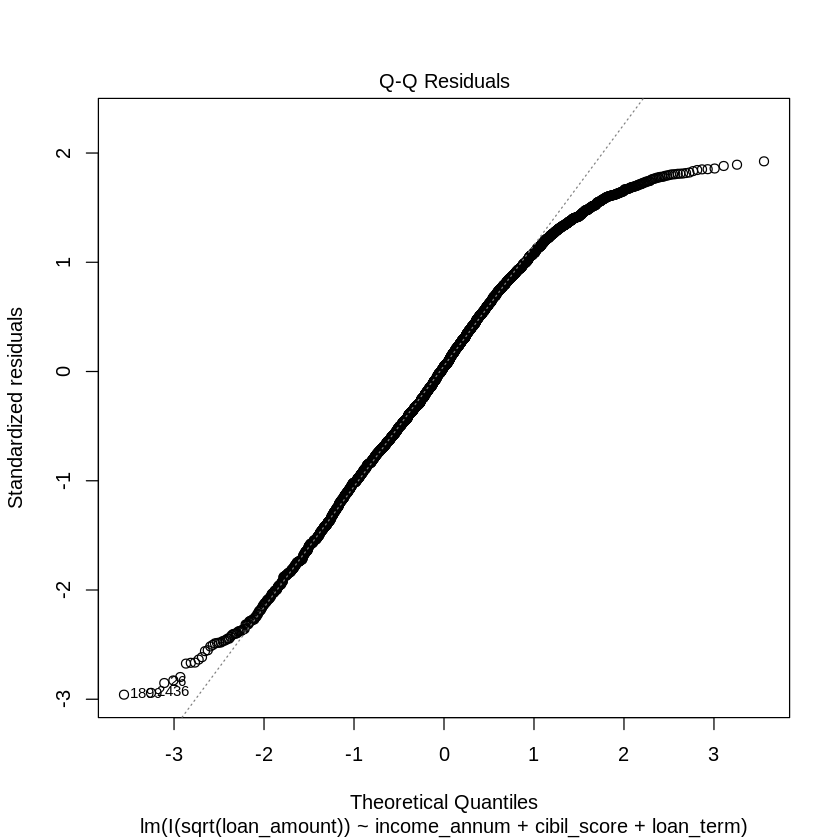

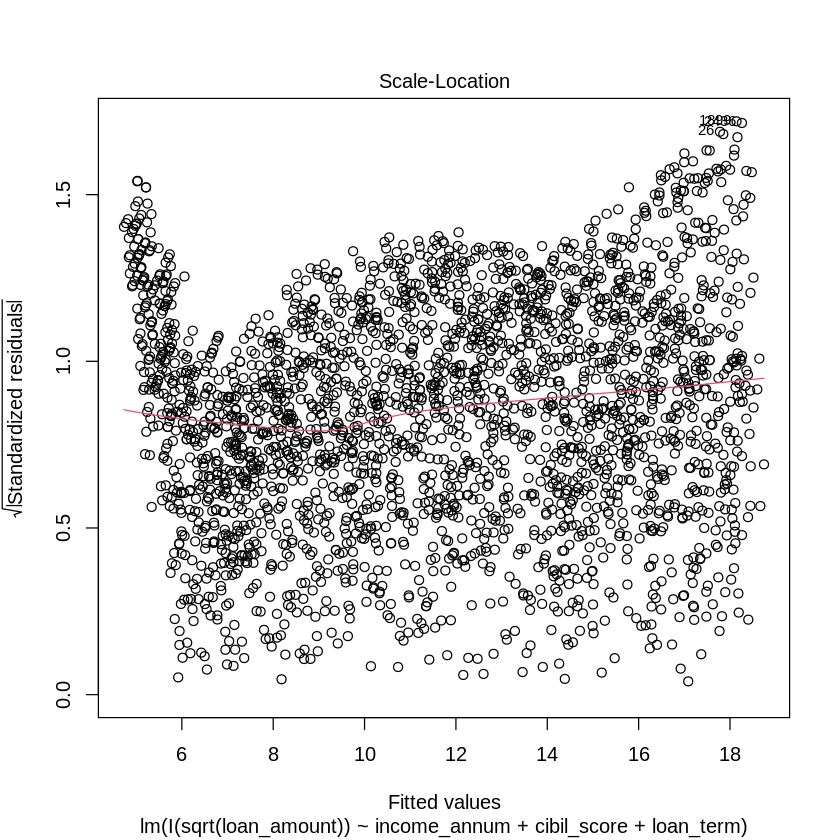

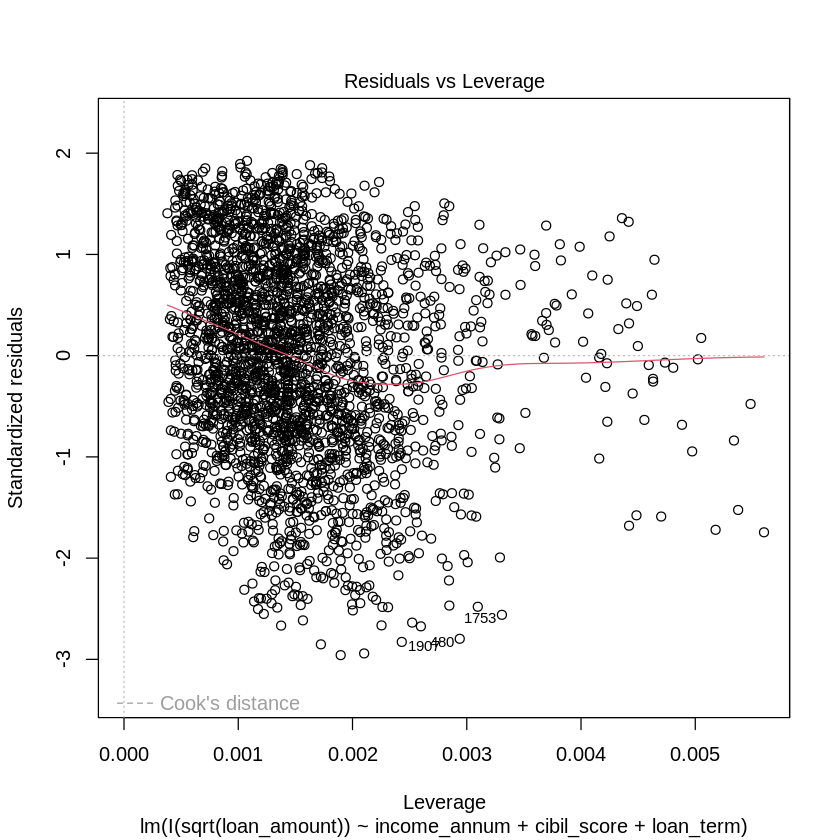

In [14]:
plot(model_log)

The Residuals vs Fitted values plot shows a quadratic pattern of the residuals, which indicates that this model is not good fit as well. The next step would be taking the log of both the explanatory variable and the response variable. So, we fit a model including the log of the loan amount and the log of the income per annum. 


Call:
lm(formula = I(log(loan_amount)) ~ I(log(income_annum)) + cibil_score + 
    loan_term, data = loan_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.65191 -0.15670  0.02862  0.17216  0.36967 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           1.242e+00  2.795e-02  44.454  < 2e-16 ***
I(log(income_annum))  1.010e+00  4.537e-03 222.615  < 2e-16 ***
cibil_score          -2.564e-04  3.186e-05  -8.047 1.27e-15 ***
loan_term            -1.145e-03  6.789e-04  -1.686   0.0919 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2011 on 2652 degrees of freedom
Multiple R-squared:  0.9493,	Adjusted R-squared:  0.9493 
F-statistic: 1.657e+04 on 3 and 2652 DF,  p-value: < 2.2e-16


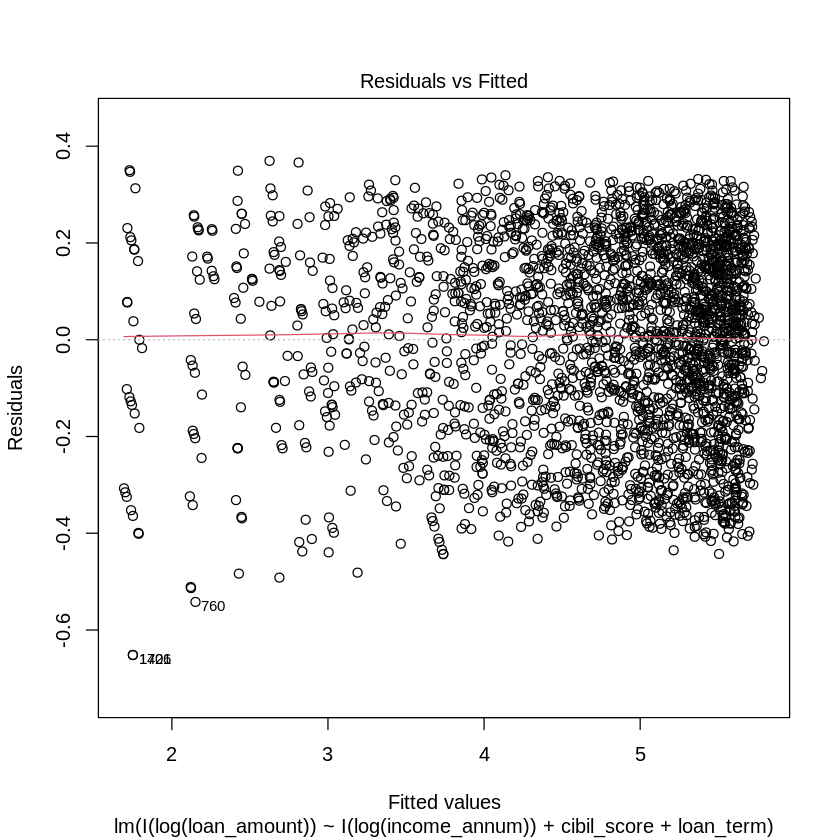

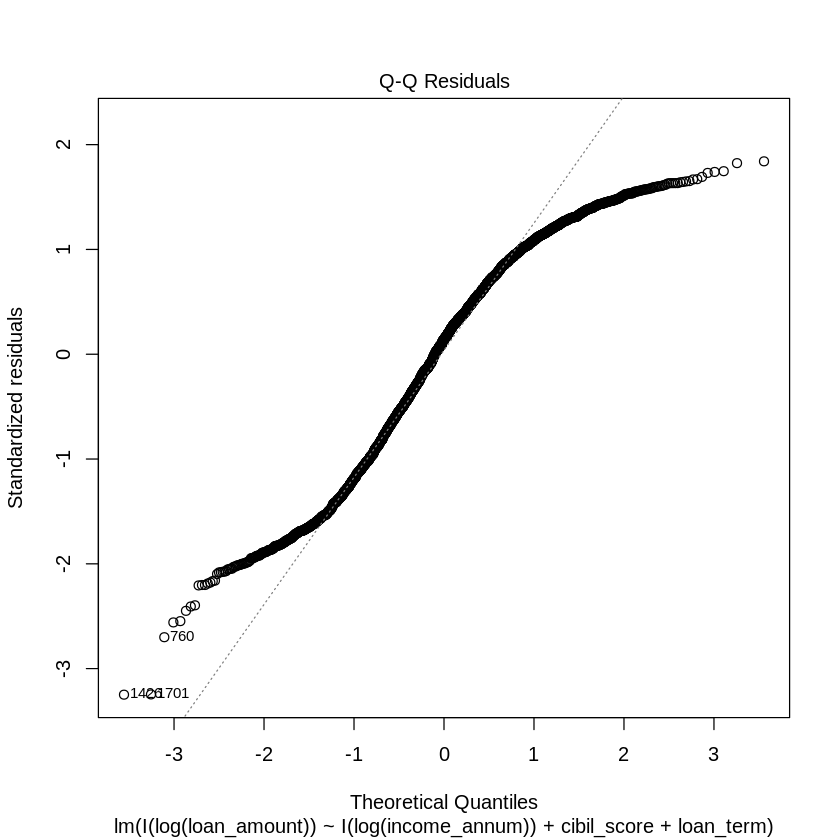

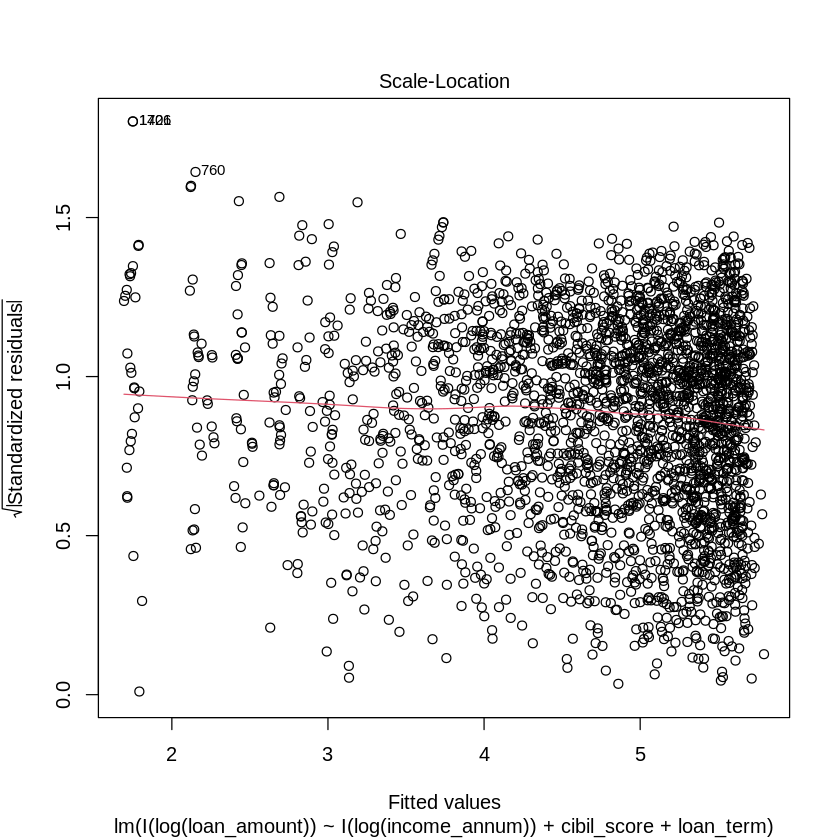

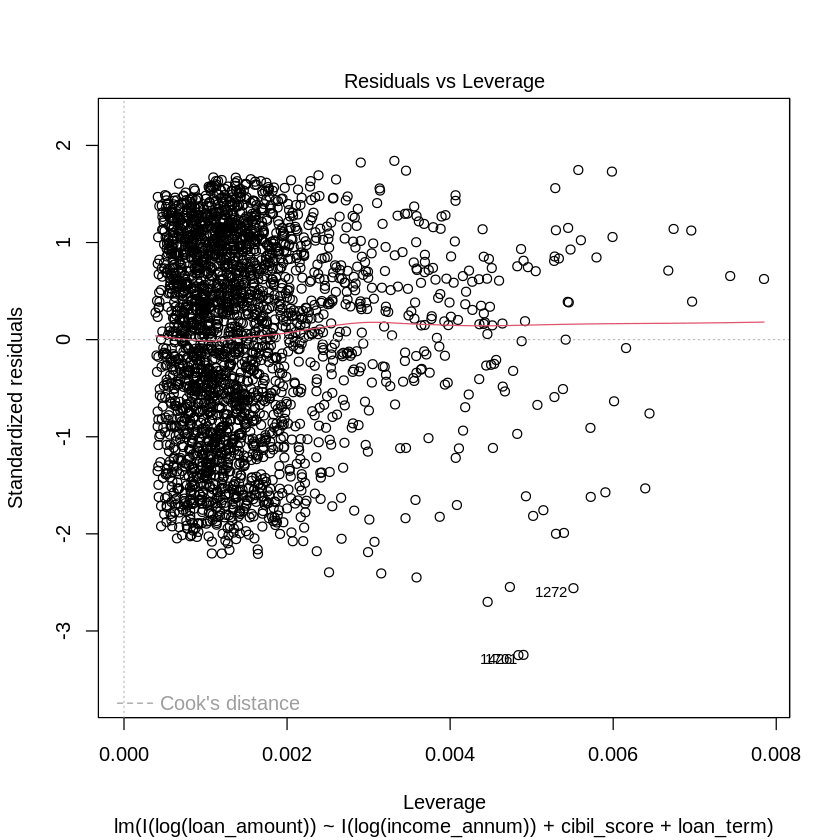

In [17]:
model_log_twice<-lm(I(log(loan_amount))~I(log(income_annum))+cibil_score+loan_term,data=loan_data)
summary(model_log_twice)
plot(model_log_twice)

The issue of heteroscedasticity appears to be resolved, since there is not fanning of the residuals in the Residuals vs Fitted values plot. It is a patternless cloud around 0 which is the ideal scenario. The QQ plot suggests that there is slight skewness, but overall it is not a big concern since most of the residuals follow a straight line, and we could assume the normality of the residuals. From the Residuals vs Leverage plot, we can say that there are no influential points that greatly impact the linear model since all the points have an acceptable value of Cook's Distance. Thus, all the residual plots posit that the logistic model fitted is a good fit and poses no glaring concerns. 
Moreover, we also achieve the largest adjusted R^2 value observed till now amongst all the model with a value of 0.9493. 
The coefficient of the log of income per annum is 1.010 which means that an increase in the income per annum by 1 unit leads to an increase in the loan amount by a factor of 1.01, which when viewed in terms of 100,000s is a notable increase.
The coefficient of the cibil score is -0.0002564, which is surprising since the negative sign indicates that as the cibil score increases, the loan amount decreases. One possible explanation could be that borrowers with higher cibil scores might be more financially prudent and less likely to take out large loans. They may prefer to borrow only what they need, leading to smaller loan amounts. However, the 
The coefficient of loan term is -0.001145, which means an increase of 1 year in the loan term leads to a decrease of loan amount by a factor of 1.001. A possible reason could be short term loans are considered less risky compared to long term loans because of a shorter maturity date. The borrower’s ability to repay a loan is less likely to change significantly over a short frame of time. 

In [19]:
# There's not really much we can do or show in this splitting into training sets and finding rmse.
# I'm not sure what else can be done here. I think we should not include at all, and focus more on the model selection
# we do earlier, using R^2, and Mallow's cp, and residuals plots and stuff. 

# Our feedback for the proposal also had this point of Inference vs Prediction. What we did earlier would be inference
# since we're trying to see which model is best, and understand the coefficients, and stuff.
# Train and holdout sets will be prediction, so anyways we have to choose one and focus so I suggest we focus on 
# Inference and leave prediction entirely. It will give us more content and adhere to the feedback and expectations
# of the grader. 

# So, I think next steps will be first, go over what I've done just to see if I've not make a big mistake, or there's a
# flaw in my logic somewhere while dealing with collinearity and heteroscedasticity. 
# Next, see what else can we include, or how to refine the flow and progression of how we decide models and eliminate others
# The final interpretation of the final model selected in some way also could be explored
# We also need more relevant data exploration plots, now that we know what we are doing ahead, we can forge new plots 
# that would be useful ahead